In [100]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.firefox.service import Service
import PRIVATE
import random
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random
from selenium.common.exceptions import NoSuchElementException

In [101]:
import pandas as pd

df = pd.read_csv("./test-csv/df_result.csv", encoding="CP949")

lecNumLists = df['학정번호'].tolist()[:3] # 테스트용으로 3개만 남김

print(lecNumLists)

['0000-1-8128-01', '0000-1-8128-02', '7000-1-3362-01']


In [115]:
def sleep_time(min_sec, max_sec):
    time.sleep(random.uniform(min_sec,max_sec))
    driver.implicitly_wait(random.uniform(min_sec,max_sec))
  
def find_n_click(xpath):
    element = driver.find_element(By.XPATH, xpath)
    element.click()
    sleep_time(1,2) 

def find_n_get_text(xpath):
    """xpath selector"""
    return WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath))).text

def get_href(xpath):
    element = driver.find_element(By.XPATH, xpath)
    href = element.get_attribute("href")
    return href

def find_n_get_review_page(lecNum):
    driver.get('https://everytime.kr/timetable/2024/1')
    sleep_time(1,2) 

    find_n_click("/html/body/div[1]/ul/li[1]") #수업목록에서 검색 버튼
    find_n_click("/html/body/div[2]/div[1]/a[4]")
    find_n_click("/html/body/div[1]/form[5]/div/label[3]")

    input_element = driver.find_element(By.XPATH, '/html/body/div[1]/form[5]/div/input')
    input_element.send_keys(lecNum)
    sleep_time(1,2) 

    find_n_click("/html/body/div[1]/form[5]/input")
    # find_n_click("/html/body/div[2]/div[2]/table/tbody/tr/td[7]/a") # 별점쪽 눌러서 강의평 이동

    xpath = "/html/body/div[2]/div[2]/table/tbody/tr/td[7]/a"
    href = get_href(xpath)
    print("url:",href)

    return href

def get_reviews(url):
    driver.get(f"{url}?tab=article")
    sleep_time(2, 3)

    reviews_dict = {}
    index = 1

    while True:
        try:
            sleep_time(0.1,0.5)
            review_xpath = f"/html/body/div/div/div[2]/div/div[2]/div[{index}]/div[2]"
            reviewer_xpath = f"/html/body/div/div/div[2]/div/div[2]/div[{index}]/div[1]/div[1]/div[2]/span[1]"
            stars_xpath = f"/html/body/div/div/div[2]/div/div[2]/div[{index}]/div[1]/div[1]/div[1]/span/span"

            stars_element = driver.find_element(By.XPATH, stars_xpath)
            style = stars_element.get_attribute("style")
            width_value = style.split("width: ")[1].split(";")[0]
            stars = (int(width_value.strip().replace("%", ""))) / 20 

            reviewer_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, reviewer_xpath))
            )
            reviewer = reviewer_element.text

            review_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, review_xpath))
            )
            review = review_element.text

            reviews_dict[f"review{index}"] = {
                'reviewer': reviewer,
                'stars': stars,
                'review': review
            }

            index += 1
        except Exception as e:
            break

    for key, review_data in reviews_dict.items():
        print(f"\n{key}:")
        print(f"reviewer: {review_data['reviewer']}")
        print(f"stars: {review_data['stars']}")
        print(f"review: {review_data['review']}")

# driver setting
driver_path = "./gecko/geckodriver"
options = webdriver.FirefoxOptions()
# options.add_argument('--headless')
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent={Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36}")

service = Service(executable_path=driver_path)
driver = webdriver.Firefox(service=service, options=options)

# id & pw
everytime_id = PRIVATE.EVERYTIME_ID
everytime_pw = PRIVATE.EVERYTIME_PW

driver.get("https://account.everytime.kr/login")
sleep_time(1,2)

driver.find_element(By.NAME, 'id').send_keys(everytime_id)
driver.find_element(By.NAME, 'password').send_keys(everytime_pw)
sleep_time(1,2)

driver.find_element(By.CSS_SELECTOR, '.container > form:nth-child(2) > input:nth-child(2)').click()
sleep_time(1,2)

try:
    href = find_n_get_review_page(lecNumLists[0])
    driver.get(href)

    try:
        case1 = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[1]/span')
        try:
            score = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "body div div.container div.pane div.info_tab section.review div.rating div.title span.average"))
        ).text

            assignment = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[1]/span")
            group_work = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[2]/span")
            grade = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[3]/span")
            chul_geul = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/span")
            test_num = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/span")

            print(f"전체 평점: {score}")
            print(f"과제: {assignment}")
            print(f"조모임: {group_work}")
            print(f"성적: {grade}")
            print(f"출결: {grade}")
            print(f"시험: {grade}")

        except Exception as e:
            pass

        get_reviews(href)

    except NoSuchElementException:
        pass

    try:
        case2 = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[1]/div[2]')
        try:
            score = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[1]/div[1]/span[1]")
            print(f"score: {score}")

            assignment_high = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[1]/div[2]").strip().replace("%", ""))
            assignment_mid = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[2]/div[2]").strip().replace("%", ""))
            assignment_low = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[3]/div[2]").strip().replace("%", ""))
            assignment_average = (assignment_high*100 + assignment_mid*50 + assignment_low*0)/100

            group_work_high = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/div[1]/div[2]").strip().replace("%", ""))
            group_work_mid = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/div[2]/div[2]").strip().replace("%", ""))
            group_work_low = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/div[3]/div[2]").strip().replace("%", ""))
            group_work_average = (group_work_high*100 + group_work_mid*50 + group_work_low*0)/100

            grade_high = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/div[1]/div[2]").strip().replace("%", ""))
            grade_mid = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/div[2]/div[2]").strip().replace("%", ""))
            grade_low = int(find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/div[3]/div[2]").strip().replace("%", ""))
            grade_average = (grade_high*100 + grade_mid*50 + grade_low*0)/100

            chul_geul_element = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[4]/div//span[contains(@class, "majority")]')
            chul_geul = chul_geul_element.text

            test_num = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[5]/div//span[contains(@class, "majority")]')
            test_num = test_num.text


            print(f"전체 평점: {score}")
            print(f"과제 평균 점수: {assignment_average}")
            print(f"조모임: {group_work_average}")
            print(f"성적: {grade_average}")
            print(f"출결: {chul_geul}")
            print(f"시험 횟수: {test_num}")

        except Exception as e:
            pass

        get_reviews(href)


    except NoSuchElementException:
        pass



finally:
    time.sleep(10) 
    driver.quit()

url: https://everytime.kr/lecture/view/2314908
score: 4.91
전체 평점: 4.91
과제 평균 점수: 67.0
조모임: 95.0
성적: 97.0
출결: 전자출결
시험 횟수: 없음

review1:
reviewer: 24년 1학기 수강자
stars: 5.0
review: 강의만 온라인으로 다 들으면 pass주는 과목입니다. 1학점 챙겨가세요

review2:
reviewer: 24년 여름 수강자
stars: 5.0
review: 온라인강의 꿀! 학기 말에 몰아서 하면 됩니다!!

review3:
reviewer: 24년 1학기 수강자
stars: 5.0
review: 강의만 수강하시면 패스 충분히 받습니다. 온라인 강의라 부담이 없습니다

review4:
reviewer: 24년 1학기 수강자
stars: 5.0
review: 강의 제때제때 틀어놓는 거랑 공지사항 내용 꼼꼼히 확인하기만 하면 쉽게 패스 가능합니다

review5:
reviewer: 24년 1학기 수강자
stars: 4.0
review: 강의 시청기간만 잘 지켜서 틀어두기만 하세요. 강의 시청이 출석입니다. 과제는 초반에 간단한 이력서? 작성 하나랑 검사 2,3개 정도 있는데 이것도 기간 잘 맞춰서 하시구요. 이력서 열심히 작성 안 하셔도 됩니다. 대신 강의 시청기간이 나중 갈 수록 점점 짧아져서 깜빡하면 기간 지나니까 주의하세요.

review6:
reviewer: 24년 1학기 수강자
stars: 5.0
review: 간단한 과제 몇 개와 영상만 다 틀어놓으면 1학점 챙겨가는 강의입니다

review7:
reviewer: 24년 1학기 수강자
stars: 3.0
review: 그냥 영상만 틀어놓으면 됨
딱히 준비할 거 없음
시험 없음

review8:
reviewer: 24년 1학기 수강자
stars: 4.0
review: 그냥 틀어놓으면 됩니다. 들으면 도움될만한 내용인데 온라인이어서 그런지 듣게 되지는 않아요! 다만 수강신청이 굉장히 빡셀뿐입니다


In [81]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.firefox.service import Service
import PRIVATE
import random
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random

def sleep_time(min_sec, max_sec):
  time.sleep(random.uniform(min_sec,max_sec))
  driver.implicitly_wait(random.uniform(min_sec,max_sec))
  
# driver setting
driver_path = "./gecko/geckodriver"
options = webdriver.FirefoxOptions()
# options.add_argument('--headless')
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent={Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36}")

service = Service(executable_path=driver_path)
driver = webdriver.Firefox(service=service, options=options)

# id & pw
everytime_id = PRIVATE.EVERYTIME_ID
everytime_pw = PRIVATE.EVERYTIME_PW

driver.get("https://account.everytime.kr/login")
sleep_time(2,4)

driver.find_element(By.NAME, 'id').send_keys(everytime_id)
driver.find_element(By.NAME, 'password').send_keys(everytime_pw)
sleep_time(2,4)

driver.find_element(By.CSS_SELECTOR, '.container > form:nth-child(2) > input:nth-child(2)').click()
sleep_time(2,4)

#login done
#############

driver.get("https://everytime.kr/lecture/view/2736439")
sleep_time(2,4)

try:
    score = WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.CSS_SELECTOR, "body div div.container div.pane div.info_tab section.review div.rating div.title span.average"))
  ).text

    assignment = WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[1]/span"))
  ).text

    group_work = WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[2]/span"))
  ).text

    grade = WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[3]/span"))
  ).text

    cul_geul = WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/span"))
  ).text

    test_num = WebDriverWait(driver, 10).until(
      EC.presence_of_element_located((By.XPATH, "/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/span"))
  ).text

    print(f"전체 평점: {score}")
    print(f"과제: {assignment}")
    print(f"조모임: {group_work}")
    print(f"성적: {grade}")
    print(f"출결: {grade}")
    print(f"시험: {grade}")

    driver.get("https://everytime.kr/lecture/view/2736439?tab=article")
    sleep_time(2, 4)

    reviews_dict = {}
    index = 1

    while True:
        try:
            sleep_time(0.1,0.5)
            review_xpath = f"/html/body/div/div/div[2]/div/div[2]/div[{index}]/div[2]"
            reviewer_xpath = f"/html/body/div/div/div[2]/div/div[2]/div[{index}]/div[1]/div[1]/div[2]/span[1]"
            stars_xpath = f"/html/body/div/div/div[2]/div/div[2]/div[{index}]/div[1]/div[1]/div[1]/span/span"

            stars_element = driver.find_element(By.XPATH, stars_xpath)
            style = stars_element.get_attribute("style")
            width_value = style.split("width: ")[1].split(";")[0]
            stars = (int(width_value.strip().replace("%", ""))) / 20 

            reviewer_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, reviewer_xpath))
            )
            reviewer = reviewer_element.text

            review_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, review_xpath))
            )
            review = review_element.text

            reviews_dict[f"review{index}"] = {
                'reviewer': reviewer,
                'stars': stars,
                'review': review
            }

            index += 1
        except Exception as e:
            break

    for key, review_data in reviews_dict.items():
        print(f"\n{key}:")
        print(f"reviewer: {review_data['reviewer']}")
        print(f"stars: {review_data['stars']}")
        print(f"review: {review_data['review']}")


finally:
    driver.quit()

전체 평점: 3.14
과제: 많음
조모임: 많음
성적: 보통
출결: 보통
시험: 보통

review1:
reviewer: 24년 1학기 수강자
stars: 2.0
review: 윤교수님 존경하시는 교수님이지만
진심 4년동안 제~~~~~~~~~~일 힘들었던 과목입니다.
어쩔 수 없이 캡스톤이라서 들었지만 일본어도 잘해서
차라리 2학기때 팡열교수님꺼 들을껄 후회했습니다.

review2:
reviewer: 24년 1학기 수강자
stars: 3.0
review: 정신건강을 위해서라도 국제 캡스톤은 이거 말고 중국 일본 다른 거 들으세요. 일단 과제 두번 발표 세번 시험 세번 봅니다. 시험 점수는 꽤나 후하게 주시기는 하는데 공부하는 그 과정이 너무 고통스러웠습니다. 그렇다고 지식을 넓힐 수 있었냐구요? 아닙니다. 초반에 교수님께서 수업을 몇 번 하시다가 후반부에는 수강생들의 발표가 대부분이었고 이 발표 내용이 그대로 시험문제에 나옵니다. 그리고 교수님께서 생각하시는 캡스톤의 학습 목표는 얼마나 열심히, 성의있게 준비하고 연습했는지가 평가기준이라고 하시나 무작정 쌩암기를 하는게 성의를 보여줄 수 있는 건지 의문입니다. 추가로 시험 수업 발표 모두 영어로 진행이 되니 영어가 부담스러우신 분들은 듣지 않는게 좋을 것 같습니다. 아무튼간에 졸업하려면 필수로 들어야해서 들었지 전선이었으면 절대 듣지 않았을겁니다 국제 후배님들은 되도록이면 이 수업은 피하시길

review3:
reviewer: 24년 1학기 수강자
stars: 2.0
review: 광운대 다니면서 들은 수업 중 가장 힘들었던 수업..
거의 숨 쉬듯이 과제 발표 시험을 내시는 교수님 (중간기말같은 시험이 3개, 과제 2개, 발표 3개) 그냥 이 수업 과제하고 발표 준비하고 시험 공부하다가 한 학기가 정신 없이 지나감
수업 내용 자체는 1학년 때 배운 국제정치이론과 비슷함.. 단지 영어로 할 뿐.. 한 학기 내내 고생이라는 개고생은 다 했는데 정작 얻어가는건 없는 느낌
이 수업은 보통 4학년이 듣는데 취업 준비하

In [89]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.firefox.service import Service
import PRIVATE
import random
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random

def sleep_time(min_sec, max_sec):
  time.sleep(random.uniform(min_sec,max_sec))
  driver.implicitly_wait(random.uniform(min_sec,max_sec))
  
def find_n_get_text(xpath):
    """xpath selector"""
    return WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, xpath))).text

# driver setting
driver_path = "./gecko/geckodriver"
options = webdriver.FirefoxOptions()
# options.add_argument('--headless')
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent={Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36}")

service = Service(executable_path=driver_path)
driver = webdriver.Firefox(service=service, options=options)

# id & pw
everytime_id = PRIVATE.EVERYTIME_ID
everytime_pw = PRIVATE.EVERYTIME_PW

driver.get("https://account.everytime.kr/login")
sleep_time(1,3)

driver.find_element(By.NAME, 'id').send_keys(everytime_id)
driver.find_element(By.NAME, 'password').send_keys(everytime_pw)
sleep_time(1,3)

driver.find_element(By.CSS_SELECTOR, '.container > form:nth-child(2) > input:nth-child(2)').click()
sleep_time(1,3)

#login done
#############

driver.get("https://everytime.kr/lecture/view/2314908")
sleep_time(1,3)


try:
    print("===inTryCase2===")
    case2 = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[1]/div[2]')
    try:
        score = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[1]/div[1]/span[1]")
        print(f"score: {score}")

        assignment_high = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[1]/div[2]")
        assignment_mid = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[2]/div[2]")
        assignment_low = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[3]/div[2]")
        assignment_average = (assignment_high*100 + assignment_mid*50 + assignment_low*0)/100

        group_work_high = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/div[1]/div[2]")
        group_work_mid = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/div[2]/div[2]")
        group_work_low = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[2]/div/div[3]/div[2]")
        group_work_average = (group_work_high*100 + group_work_mid*50 + group_work_low*0)/100

        grade_high = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/div[1]/div[2]")
        grade_mid = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/div[2]/div[2]")
        grade_low = find_n_get_text("/html/body/div/div/div[2]/div/section[2]/div[2]/div[3]/div/div[3]/div[2]")
        grade_average = (grade_high*100 + grade_mid*50 + grade_low*0)/100

        chul_geul_element = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[4]/div//span[contains(@class, "majority")]')
        chul_geul = chul_geul_element.text

        test_num = driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div/section[2]/div[2]/div[5]/div//span[contains(@class, "majority")]')
        test_num = test_num.text


        print(f"전체 평점: {score}")
        print(f"과제 평균 점수: {assignment_average}")
        print(f"조모임: {group_work_average}")
        print(f"성적: {grade_average}")
        print(f"출결: {chul_geul}")
        print(f"시험 횟수: {test_num}")

    except Exception as e:
        pass

except NoSuchElementException:
    pass

finally:
    driver.quit()

===inTryCase2===
score: 4.91


case1.
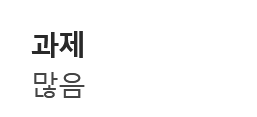

- xpath: /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[1]/span

case2.
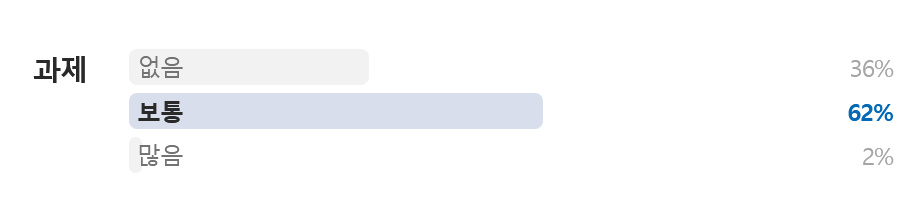

- xpath: /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[1]/div[2]
- xpath: /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[2]/div[2]
- xpath: /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div/div[3]/div[2]


num: 2736439

url: https://everytime.kr/lecture/view/{num}

url: https://everytime.kr/lecture/view/2736439

- 점수 : .averagehtml body div div.container div.pane div.info_tab section.review div.rating div.title span.average
- 과제 : /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[1]/span
- 조모임 : /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[2]/span
- 성적 : /html/body/div/div/div[2]/div/section[2]/div[2]/div[1]/div[3]/span

---

url: https://everytime.kr/lecture/view/{num}?tab=article

- 강의평1: /html/body/div/div/div[2]/div/div[2]/div[1]/div[2]
- 강의평2: /html/body/div/div/div[2]/div/div[2]/div[2]/div[2]
- ...
- 강의평n: /html/body/div/div/div[2]/div/div[2]/div[n]/div[2]

- reviewer: /html/body/div/div/div[2]/div/div[2]/div[1]/div[1]/div[1]/div[2]/span[1]
- reviewer: /html/body/div/div/div[2]/div/div[2]/div[3]/div[1]/div[1]/div[2]/span[1]

- star: /html/body/div/div/div[2]/div/div[2]/div[{number}]/div[1]/div[1]/div[1]/span/span


In [32]:
import sqlite3
import os

db_folder = "./database"

db_path = os.path.join(db_folder, "lecture.db")

conn = sqlite3.connect(db_path)
cursor = conn.cursor()


#create test LectureTable
cursor.execute('''
CREATE TABLE IF NOT EXISTS LectureTable (
    lecNumber TEXT PRIMARY KEY,
    lecClassification TEXT,
    lecProfessor TEXT
)
''')

#create LecReviewTable
cursor.execute('''
CREATE TABLE IF NOT EXISTS LecReviewTable (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    lecNumber TEXT,
    lecReviewrs TEXT
    lecStars INTEGER,
    lecReview TEXT,
    FOREIGN KEY (lecNumber) REFERENCES LectureTable (lecNumber)
)
''')

lectures = [
    ('CS101', 'Computer Science', 'Dr. Smith'),
    ('MATH201', 'Mathematics', 'Dr. Johnson'),
    ('PHYS301', 'Physics', 'Dr. Lee')
]

reviews = [
    (1, 'CS101', 5, 'Great lecture!'),
    (2, 'CS101', 4, 'Very informative.'),
    (3, 'MATH201', 3, 'Average class.'),
    (4, 'PHYS301', 2, 'Not very engaging.'),
    (5, 'PHYS301', 1, 'Difficult to understand.')
]

cursor.executemany('''
INSERT OR IGNORE INTO LectureTable (lecNumber, lecClassification, lecProfessor)
VALUES (?, ?, ?)
''', lectures)

cursor.executemany('''
INSERT INTO LecReviewTable (id, lecNumber, lecStars, lecReview)
VALUES (?, ?, ?, ?)
''', reviews)

conn.commit()

cursor.execute('SELECT * FROM LectureTable')
print("LectureTable 데이터:")
for row in cursor.fetchall():
    print(row)

cursor.execute('SELECT * FROM LecReviewTable')
print("\nLecReviewTable 데이터:")
for row in cursor.fetchall():
    print(row)

# 연결 종료
conn.close()


LectureTable 데이터:
('CS101', 'Computer Science', 'Dr. Smith')
('MATH201', 'Mathematics', 'Dr. Johnson')
('PHYS301', 'Physics', 'Dr. Lee')

LecReviewTable 데이터:
(1, 'CS101', 5, 'Great lecture!')
(2, 'CS101', 4, 'Very informative.')
(3, 'MATH201', 3, 'Average class.')
(4, 'PHYS301', 2, 'Not very engaging.')
(5, 'PHYS301', 1, 'Difficult to understand.')
